In [1]:

## import statements for the regression pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# import scaling methods
from sklearn.preprocessing import RobustScaler, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

# import modeling methods
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from scipy import stats

# import to remove warnings
import warnings
warnings.filterwarnings("ignore")

### Acquire 

Acquire the dataset from kaggle.com where each reservation represents a real estate property

link to dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [3]:
## acquire our data from our local csv

df = pd.read_csv('housing_data.csv', index_col=0) ## reading our csv into a pandas dataframe

df.head() ## previewing our data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape ## taking a look at the shape of the dataframe

(1460, 80)

There are a limited amount of observations with only 1460. This means I will have to careful on what decision is made to deal with null values and outliers.

Let's take a look at the columns and their data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Looks like there are some nulls in certain columns that will need to be dealt with in the prepare phase.

In [8]:
stats = df.describe().T ## looking at numerical statistics
stats

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [10]:
## adding a range column to the numerical statistics dataframe called stats for more info

stats['range'] = stats['max'] - stats['min']

stats

,count,mean,std,min,25%,50%,75%,max,range
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,170.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,292.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,213945.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,9.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,8.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,138.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,60.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,1474.0


There are a lot of columns that will need to looked out in the prepare phase to determine which columns will be beneficial to predicting the target SalePrice.

In [17]:
df.columns ## getting a list of the columns in the dataframe

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Distribution of MSSubClass



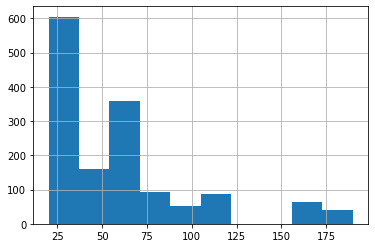

--------------------
Distribution of MSZoning



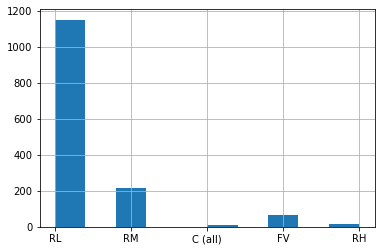

--------------------
Distribution of LotFrontage



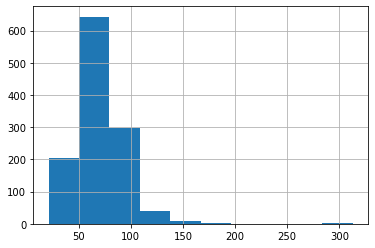

--------------------
Distribution of LotArea



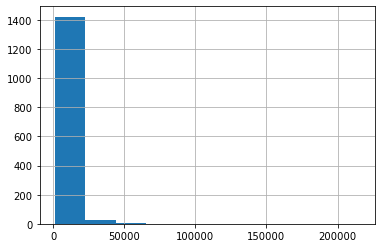

--------------------
Distribution of Street



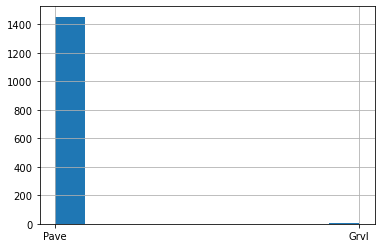

--------------------
Distribution of Alley



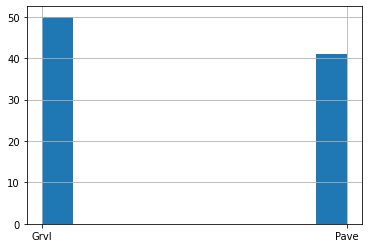

--------------------
Distribution of LotShape



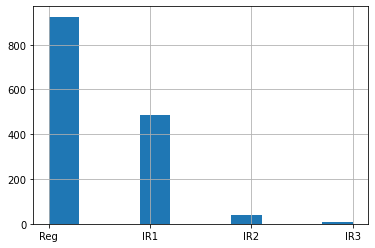

--------------------
Distribution of LandContour



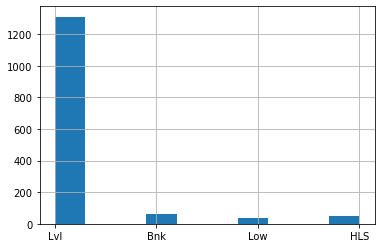

--------------------
Distribution of Utilities



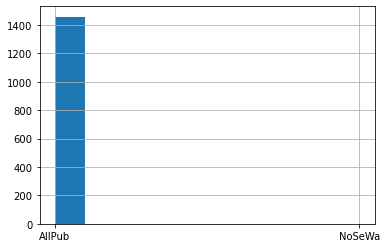

--------------------
Distribution of LotConfig



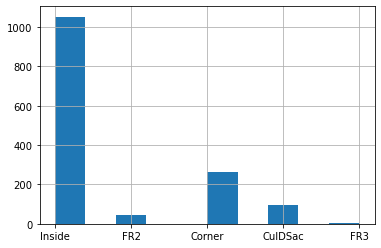

--------------------
Distribution of LandSlope



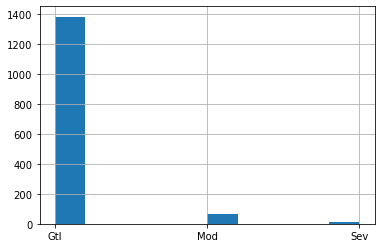

--------------------
Distribution of Neighborhood



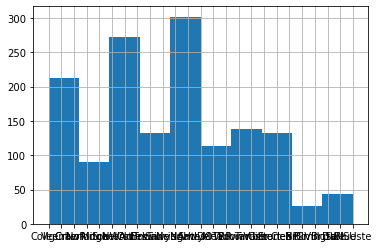

--------------------
Distribution of Condition1



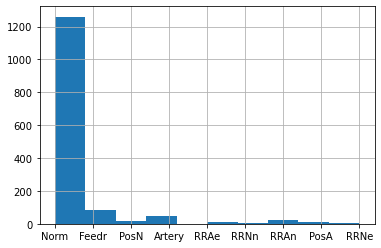

--------------------
Distribution of Condition2



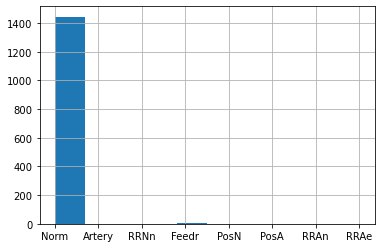

--------------------
Distribution of BldgType



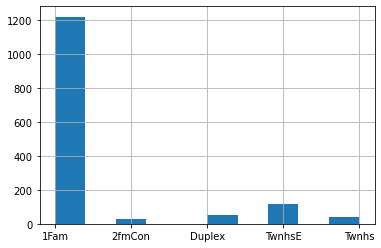

--------------------
Distribution of HouseStyle



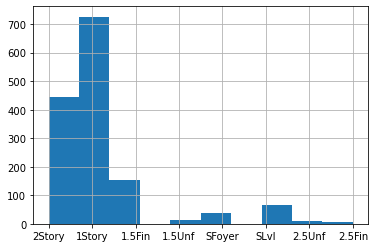

--------------------
Distribution of OverallQual



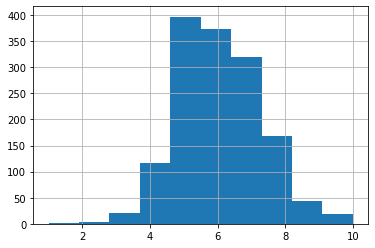

--------------------
Distribution of OverallCond



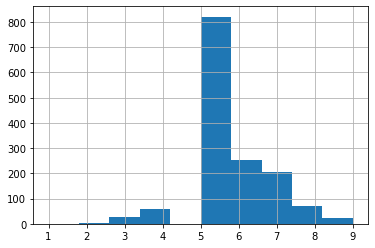

--------------------
Distribution of YearBuilt



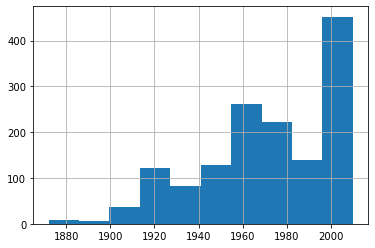

--------------------
Distribution of YearRemodAdd



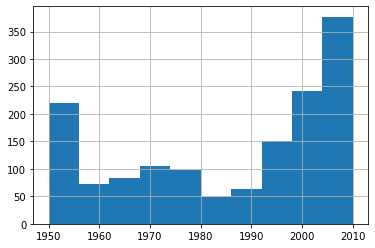

--------------------
Distribution of RoofStyle



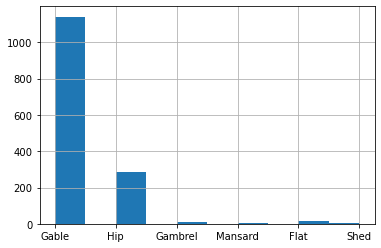

--------------------
Distribution of RoofMatl



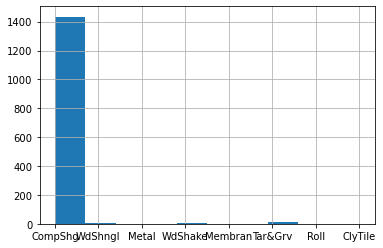

--------------------
Distribution of Exterior1st



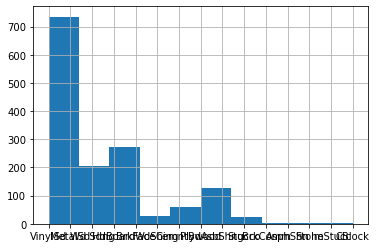

--------------------
Distribution of Exterior2nd



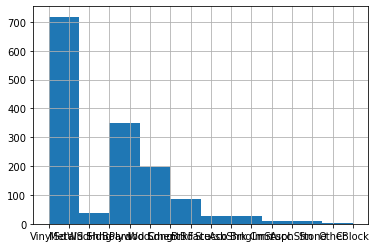

--------------------
Distribution of MasVnrType



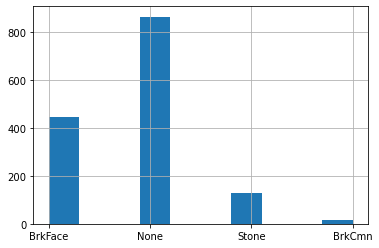

--------------------
Distribution of MasVnrArea



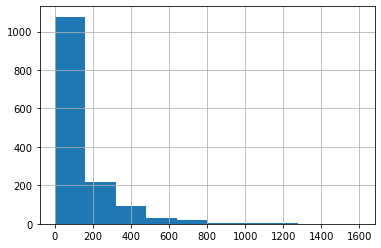

--------------------
Distribution of ExterQual



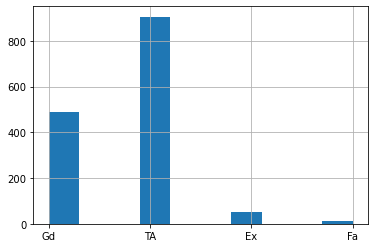

--------------------
Distribution of ExterCond



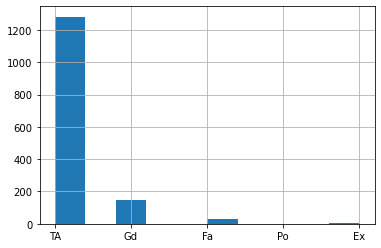

--------------------
Distribution of Foundation



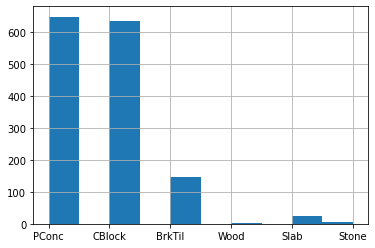

--------------------
Distribution of BsmtQual



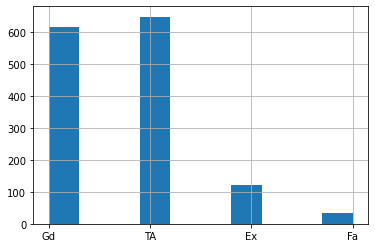

--------------------
Distribution of BsmtCond



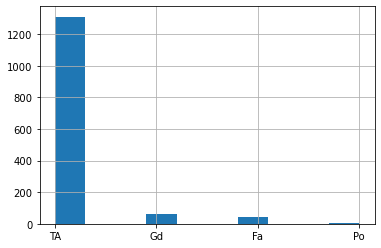

--------------------
Distribution of BsmtExposure



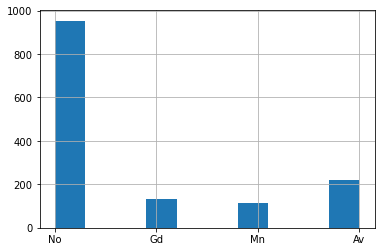

--------------------
Distribution of BsmtFinType1



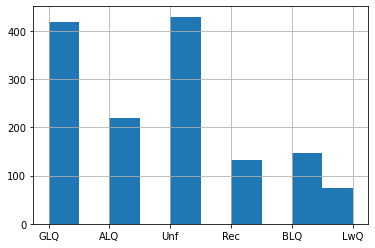

--------------------
Distribution of BsmtFinSF1



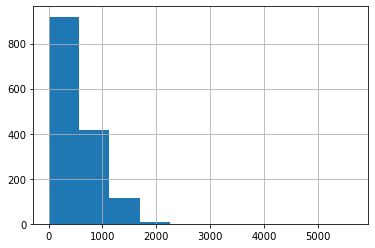

--------------------
Distribution of BsmtFinType2



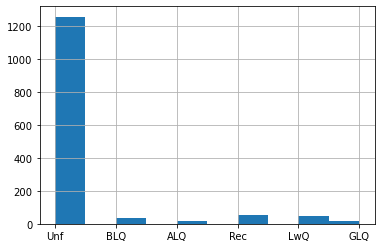

--------------------
Distribution of BsmtFinSF2



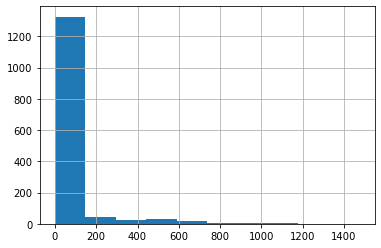

--------------------
Distribution of BsmtUnfSF



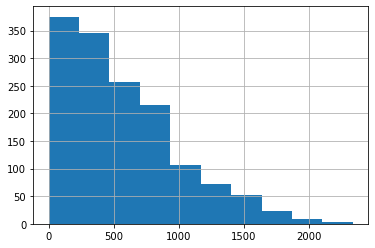

--------------------
Distribution of TotalBsmtSF



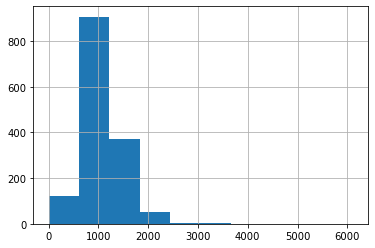

--------------------
Distribution of Heating



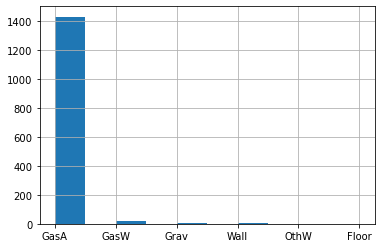

--------------------
Distribution of HeatingQC



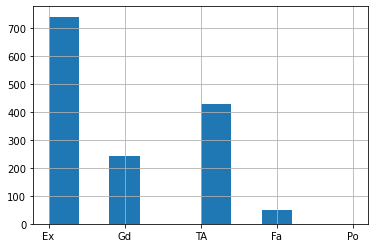

--------------------
Distribution of CentralAir



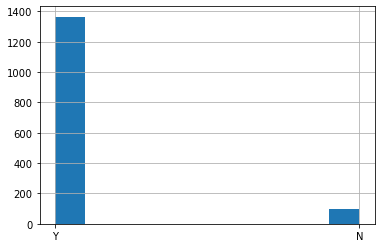

--------------------
Distribution of Electrical



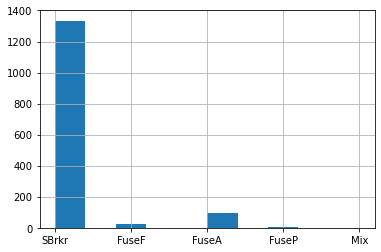

--------------------
Distribution of 1stFlrSF



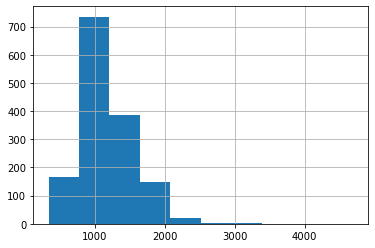

--------------------
Distribution of 2ndFlrSF



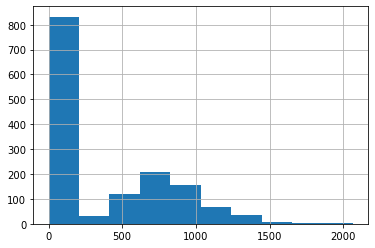

--------------------
Distribution of LowQualFinSF



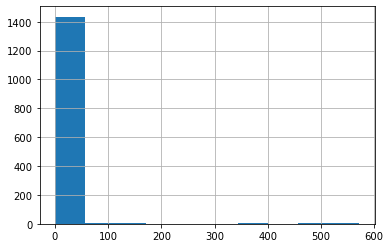

--------------------
Distribution of GrLivArea



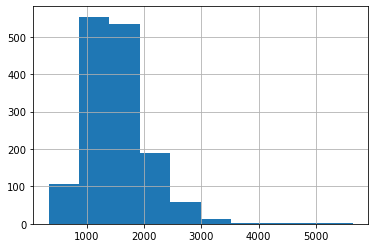

--------------------
Distribution of BsmtFullBath



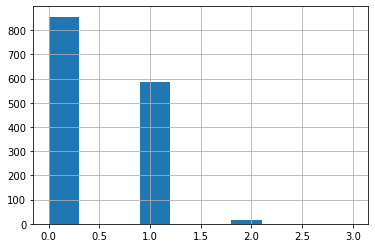

--------------------
Distribution of BsmtHalfBath



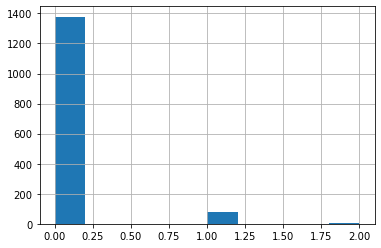

--------------------
Distribution of FullBath



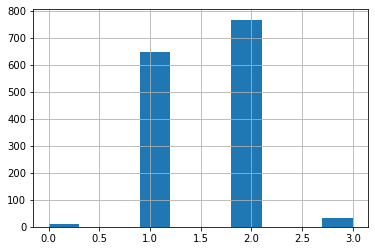

--------------------
Distribution of HalfBath



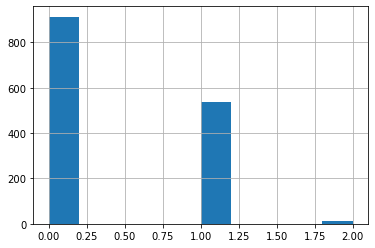

--------------------
Distribution of BedroomAbvGr



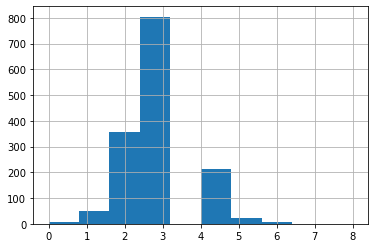

--------------------
Distribution of KitchenAbvGr



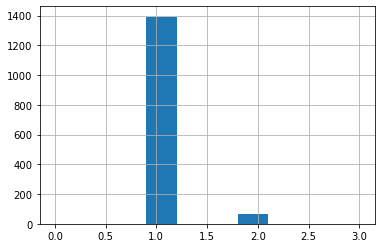

--------------------
Distribution of KitchenQual



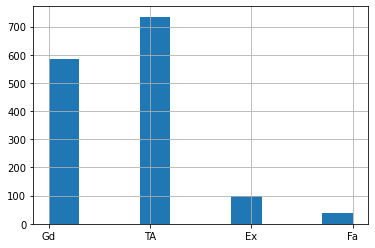

--------------------
Distribution of TotRmsAbvGrd



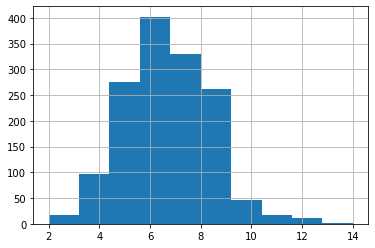

--------------------
Distribution of Functional



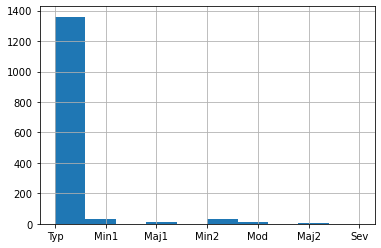

--------------------
Distribution of Fireplaces



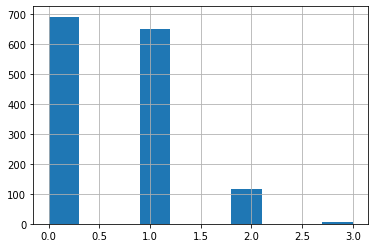

--------------------
Distribution of FireplaceQu



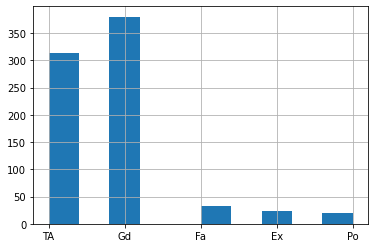

--------------------
Distribution of GarageType



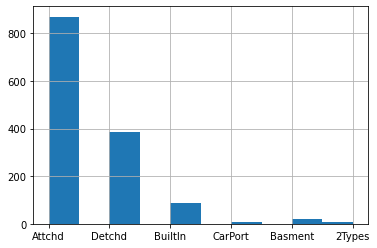

--------------------
Distribution of GarageYrBlt



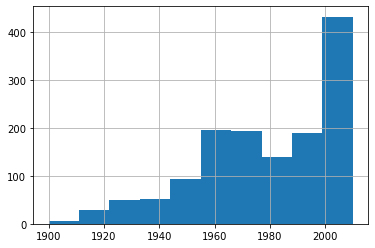

--------------------
Distribution of GarageFinish



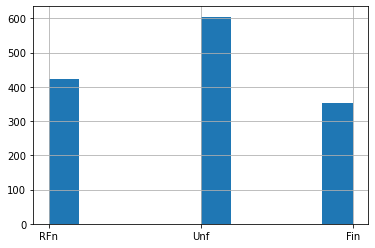

--------------------
Distribution of GarageCars



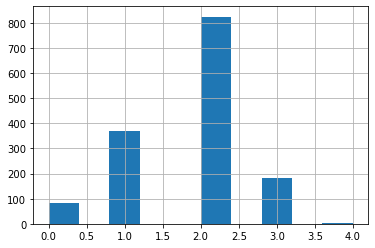

--------------------
Distribution of GarageArea



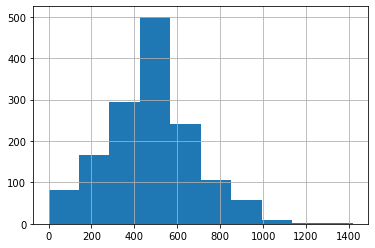

--------------------
Distribution of GarageQual



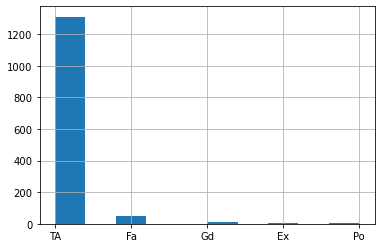

--------------------
Distribution of GarageCond



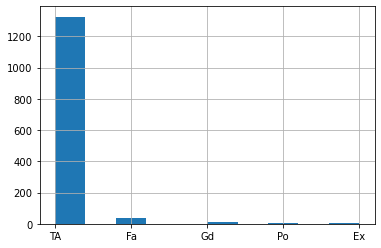

--------------------
Distribution of PavedDrive



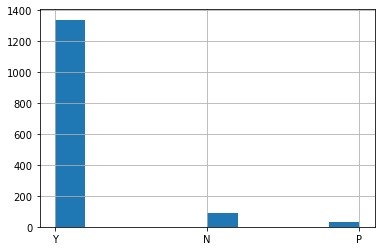

--------------------
Distribution of WoodDeckSF



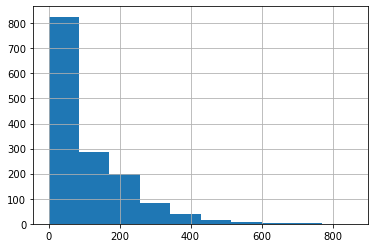

--------------------
Distribution of OpenPorchSF



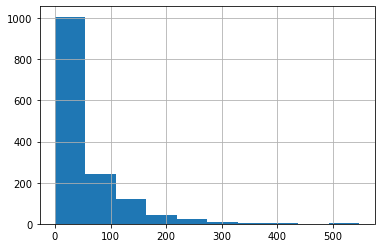

--------------------
Distribution of EnclosedPorch



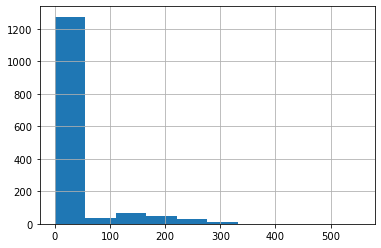

--------------------
Distribution of 3SsnPorch



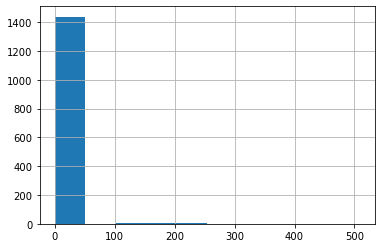

--------------------
Distribution of ScreenPorch



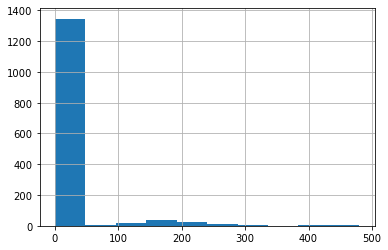

--------------------
Distribution of PoolArea



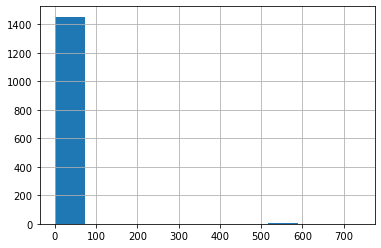

--------------------
Distribution of PoolQC



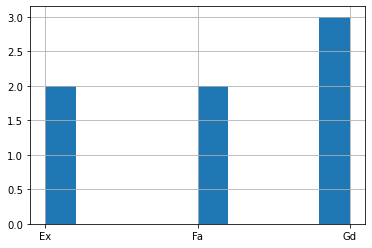

--------------------
Distribution of Fence



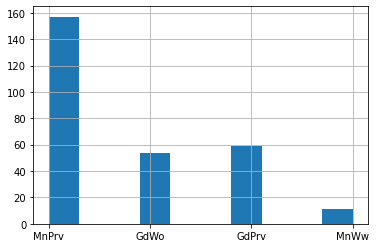

--------------------
Distribution of MiscFeature



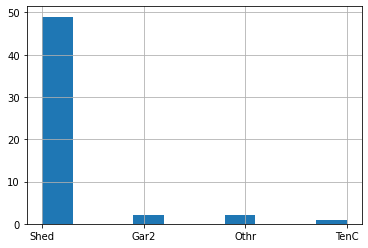

--------------------
Distribution of MiscVal



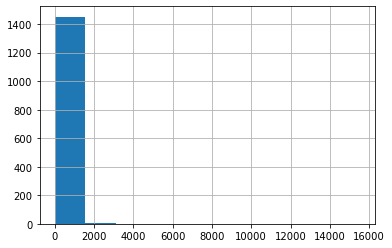

--------------------
Distribution of MoSold



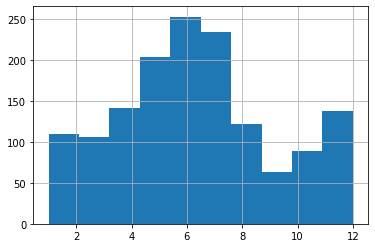

--------------------
Distribution of YrSold



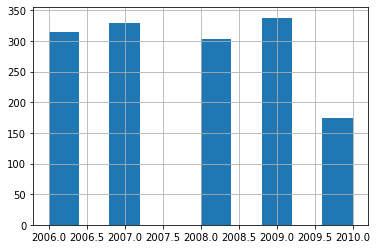

--------------------
Distribution of SaleType



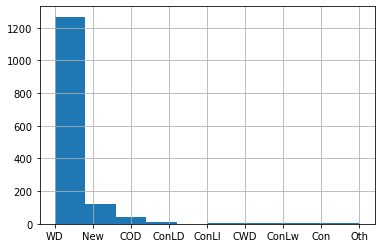

--------------------
Distribution of SaleCondition



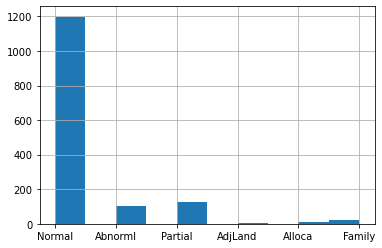

--------------------
Distribution of SalePrice



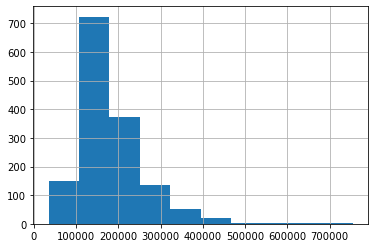

--------------------


In [18]:
## looking at our continuous variable distributions
list = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

for x in list:
    print(f'Distribution of {x}\n')
    df[x].hist()
    plt.show()
    print('--------------------') 

### Prepare 

In [19]:
## we already checked for null values by doing the df.info() and we saw there
## were none so will now check for duplicate observations

df.duplicated().sum()

0

Having zero duplicate observations is greate. This means I won't have to remove any rows. Let's take a look at the columns for null values.

In [23]:
df.info() ## going to remove the columns with too many null values for now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
df = df.drop(columns = ['FireplaceQu', 'Fence', 'MiscFeature', 'PoolQC', 'Alley'])

In [25]:
df.info() ## quality assurance check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [26]:
df.isnull().sum() ## checking nulls again2

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [27]:
df = df.dropna() ## dropping the other null because they are now 10 percent less than the amount of observations

In [29]:
df.isnull().sum() ## making sure they are all gone

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [31]:
train_validate, test = train_test_split(df, test_size=.2, 
                                    random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, 
                               random_state=123)

print('Making Sure Our Shapes Look Good')
print(f'Train: {train.shape}, Validate: {validate.shape}, Test: {test.shape}')
print('----------------------------\n')

print('Making Sure We Have Positive Cases In Each Split\n')

print('Train Target Value Counts:')
print(train.RainTomorrow.value_counts())
print('----------------------------\n')

print('Validate Target Value Counts:')
print(validate.RainTomorrow.value_counts())
print('----------------------------\n')

print('Test Target Value Counts:')
print(test.RainTomorrow.value_counts())
print('----------------------------\n')

Making Sure Our Shapes Look Good
Train: (612, 75), Validate: (263, 75), Test: (219, 75)
----------------------------

Making Sure We Have Positive Cases In Each Split

Train Target Value Counts:


AttributeError: 'DataFrame' object has no attribute 'RainTomorrow'